# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Ali Fakhar
2.   Student Number: 400206335
 
 I used some documantations and some examples on the internet

*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
# from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt
from sklearn.metrics import mean_squared_error
import copy
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.3)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv('/home/ali/Desktop/data/user_artists.dat', sep='\t')
artists = pd.read_csv('/home/ali/Desktop/data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [3]:
artists

,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte
...,...,...
17627,18741,Diamanda Galás
17628,18742,Aya RL
17629,18743,Coptic Rain
17630,18744,Oz Alchemist


In [4]:
plays

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [5]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################
# plays = pd.read_csv('/home/ali/Desktop/data/user_artists.dat', sep='\t')
# artists = pd.read_csv('/home/ali/Desktop/data/artists.dat', sep='\t', usecols=['id','name'])
# plays = plays.rename(columns={"artistID":"id"})
# plays= plays.merge(artists, on="artistID", how='left')
# pd.concat([plays.sort_values("id"), artists], axis=1).sort_values("artistID")
# plays.merge(artists, on=["artistID","id"], how='left')
# plays= plays.merge(artists, on="id", how='left')
# plays = plays.rename(columns={"artistID":"id"})
########### plays.sort_values("artistID")
# pd.concat([plays.sort_values("artistID"), artists], axis=1).sort_values("artistID")
# plays.merge(artists, on=["artistID","id"], how='left')
# plays = plays.rename(columns={"artistID":"id"})
# plays.sort_values("artistID")
# plays
# # plays.sort_values("artistID")
# # plays.reset_index()
# plays = plays.reindex(columns=["artistID","userID","weight"])
# plays
# artists
plays = plays.sort_values(by=['artistID', 'userID'], ascending=True)
duplicate = plays.pivot_table(columns=['artistID'], aggfunc='size')
artists = artists.loc[artists.index.repeat(duplicate)].reset_index(drop=True)
plays_sorted = plays.sort_values(by=['artistID', 'userID'], ascending=True).reset_index(drop=True)
ap = pd.concat([artists, plays_sorted], axis=1, join='inner')

# ap =# Your Code

In [6]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [7]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [8]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

app = copy.deepcopy(ap)
del app['id']
app.reset_index(drop=True)
app
#TODO

,name,userID,artistID,playCount
0,MALICE MIZER,34,1,212
1,MALICE MIZER,274,1,483
2,MALICE MIZER,785,1,76
3,Diary of Dreams,135,2,1021
4,Diary of Dreams,257,2,152
...,...,...,...,...
92829,Diamanda Galás,454,18741,301
92830,Aya RL,454,18742,294
92831,Coptic Rain,454,18743,287
92832,Oz Alchemist,454,18744,286


In [9]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################
totalArtistPlays = ap.groupby(['id']).sum()
unique_user = ap["name"].unique()
totalUniqueUsers = ap.pivot_table(columns=['id'], aggfunc='size')
type(totalUniqueUsers)
artist_rank = pd.DataFrame({'name' : unique_user,
                            'totalUniqueUsers' : totalUniqueUsers,'totalArtistPlays' : totalArtistPlays['playCount']})
artist_rank["avgUserPlays"] = artist_rank["totalArtistPlays"]/artist_rank["totalUniqueUsers"]
artist_rank = artist_rank.sort_values(by=['totalArtistPlays'], ascending=False).reset_index(drop=True)
artist_rank = artist_rank.set_index('name')
# artist_rank = # Your Code
# artist_rank['avgUserPlays'] = # Your Code

In [10]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
K-Precise,1,1,1.000000
ZÜNDER,1,1,1.000000
Evil Masquerade,1,1,1.000000


In [11]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################
ap = ap.join(artist_rank, on="name", how="inner")
ap = ap.sort_values(['playCount'], ascending=False)
# ap = #TODO

In [12]:
ap

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
...,...,...,...,...,...,...,...,...
38688,913,Destiny's Child,1810,913,1,83,34746,418.626506
32955,697,Sia,1290,697,1,56,27597,492.803571
71811,4988,Chris Spheeris,510,4988,1,5,3106,621.200000
91319,17080,Haylie Duff,1851,17080,1,1,1,1.000000


In [13]:
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
21191,378,Evanescence,1146,378,203165,226,513476,2272.017699
14165,292,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,701,Shakira,1983,701,172496,319,688529,2158.398119
33127,701,Shakira,757,701,169596,319,688529,2158.398119
31835,679,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [14]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

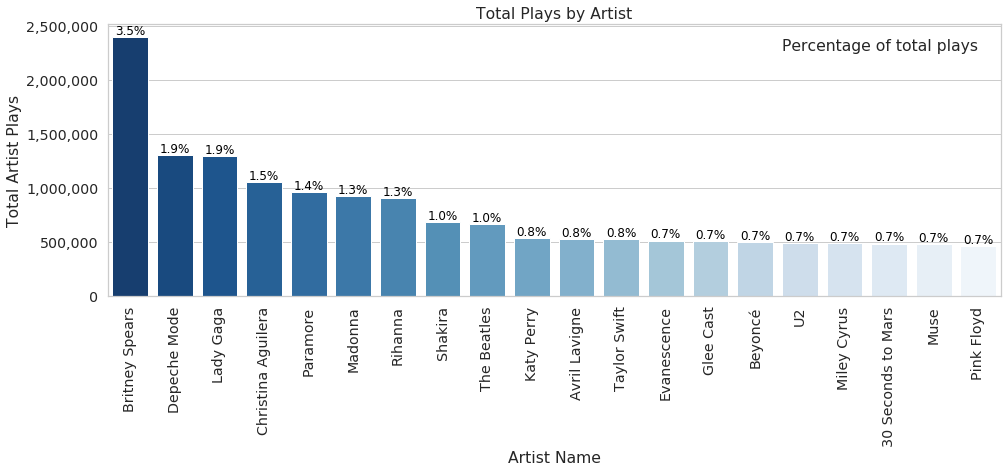

In [15]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

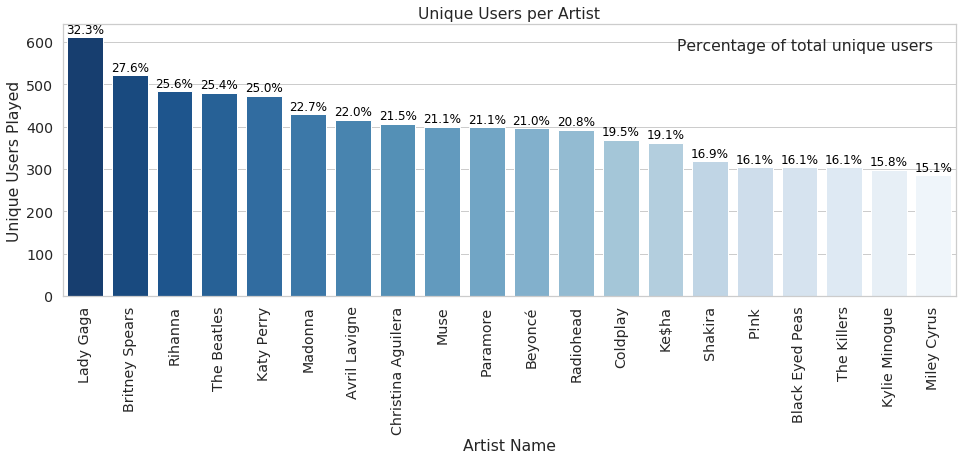

In [16]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

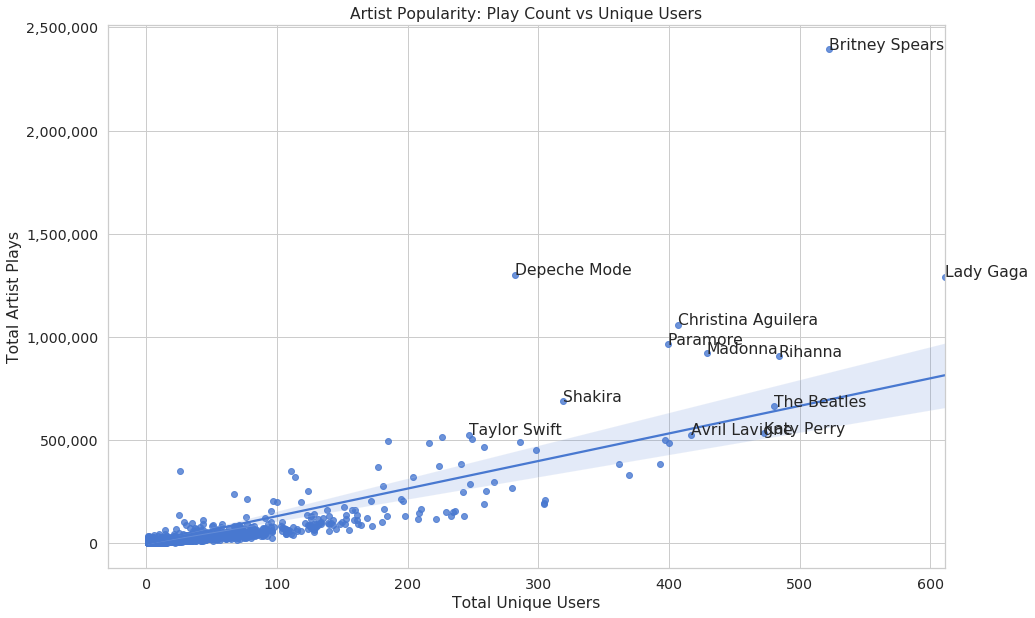

In [17]:
top_artists = artist_rank.sort_values(['totalArtistPlays'],ascending=False).index[:12] 
# TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank.totalUniqueUsers
# TODO : "totalUniqueUsers" of "artist_rank"
y =  artist_rank.totalArtistPlays 
# TODO :  "totalArtistPlays" of "artist_rank"
labels =  artist_rank.index 
# TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [18]:
appp = ap
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [19]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################
ratings_df = ap.pivot(index='userID', columns='artistID',  values='playCountScaled')
# ratings_df = # Your Code
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################
ratings = ratings_df.fillna(0).values
# ratings = # Your Code
# ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00115397, ..., 0.        , 0.        ,
        0.        ]])

In [21]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################
## Your Code
m , n = ratings.shape
s = len(ratings.nonzero()[0]) * 100 / (m*n)
print(s,"percent")
## END

0.2763750225421394 percent


# Fitting(Training) Model (50pts)

In [22]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################
def train_test_split(ratings):
    validation = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in np.arange(ratings.shape[0]):
        if len(ratings[user,:].nonzero()[0]) >= MIN_USER_RATINGS:
            val_ratings = np.random.choice(ratings[user, :].nonzero()[0],size=DELETE_RATING_COUNT,
                replace=False)
            train[user, val_ratings] = 0
            validation[user, val_ratings] = ratings[user, val_ratings]
    return train, validation

In [23]:
train, val = train_test_split(ratings)

In [24]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten() 
    return sqrt(mean_squared_error(prediction, ground_truth))

In [25]:
class Recommender:
    def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
        self.n_epochs = n_epochs
        self.n_latent_features = n_latent_features
        self.lmbda = lmbda
        self.learning_rate = learning_rate
  
    def predictions(self, P, Q):
        return np.dot(P.T, Q)
        #TODO : create the prediction matrix
  
    def fit(self, X_train, X_val):
        #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
        #TODO : save the loss on train and validation data in each iteration
        m, n = X_train.shape
        self.Q = np.random.rand(self.n_latent_features, n)
        self.P = np.random.rand(self.n_latent_features, m)
        self.train_error = []
        self.val_error = []
        users, items = X_train.nonzero()
        for epoch in range(self.n_epochs):
            for u, i in zip(users, items):
                e = X_train[u, i] - self.predictions(self.P[:,u], self.Q[:,i])
                self.P[:, u] = self.P[:, u] + self.learning_rate * (e * self.Q[:, i] - self.lmbda * self.P[:, u])
                self.Q[:, i] = self.Q[:, i] + self.learning_rate * (e * self.P[:, u] - self.lmbda * self.Q[:, i])

            train_rmse = rmse(self.predictions(self.P, self.Q), X_train)
            val_rmse = rmse(self.predictions(self.P, self.Q), X_val)
            self.val_error.append(val_rmse)
            self.train_error.append(train_rmse)
        return self

    def predict(self, X_train, user_index):
        y_sol = self.predictions(self.P, self.Q)
        predictions_ind = np.where(X_train[user_index, :] == 0)[0]
        return y_sol[user_index, predictions_ind].flatten()
        #TODO : return predicted ratings for unobserved values of specific user index

In [26]:
#creating recommender object
recommender = Recommender().fit(train, val)

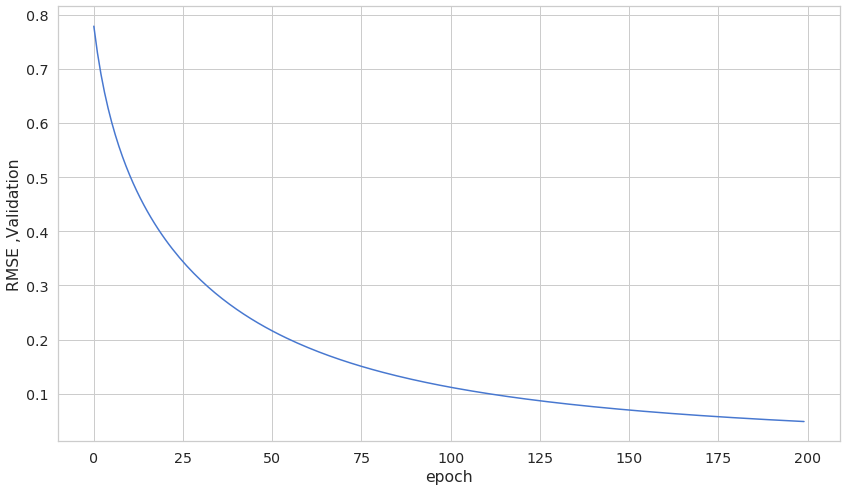

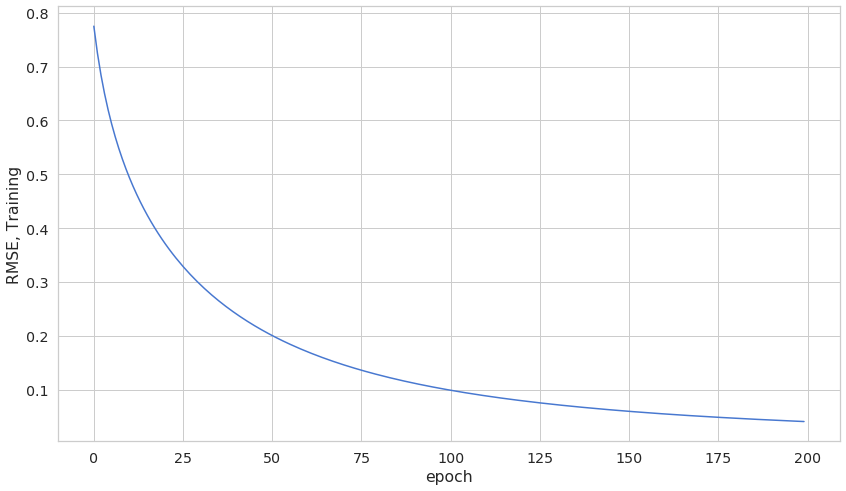

In [27]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
plt.plot(range(recommender.n_epochs), recommender.val_error);
plt.xlabel('epoch');
plt.ylabel('RMSE ,Validation');
plt.show()
plt.plot(range(recommender.n_epochs), recommender.train_error);
plt.xlabel('epoch');
plt.ylabel('RMSE, Training');
plt.show()
#TODO


In [28]:
print(recommender.val_error[-1])

0.04841399747662771


# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

In [29]:
#it has better answer and the main reason is that we sum the value of error with the mean of ground truth;
#the main idea of that is based on paper but the reason is that we want to have some biases toward the value that,
#those value are more popular; as you can see error is much lower.
pc = appp.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max()-pc.min())
# play_count_scaled += play_count_scaled.min()
appp = appp.assign(playCountScaled=play_count_scaled)
ratingss_df = appp.pivot(index='userID', columns='artistID',  values='playCountScaled')

ratingss = ratingss_df.fillna(0).values
train, val = train_test_split(ratingss)
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten() 
    a = (prediction- ground_truth).mean()
    b = ground_truth.mean()
    return float(a) + float(b)
recommender = Recommender().fit(train, val)
print((recommender.val_error[-1]))


0.019829651247669684


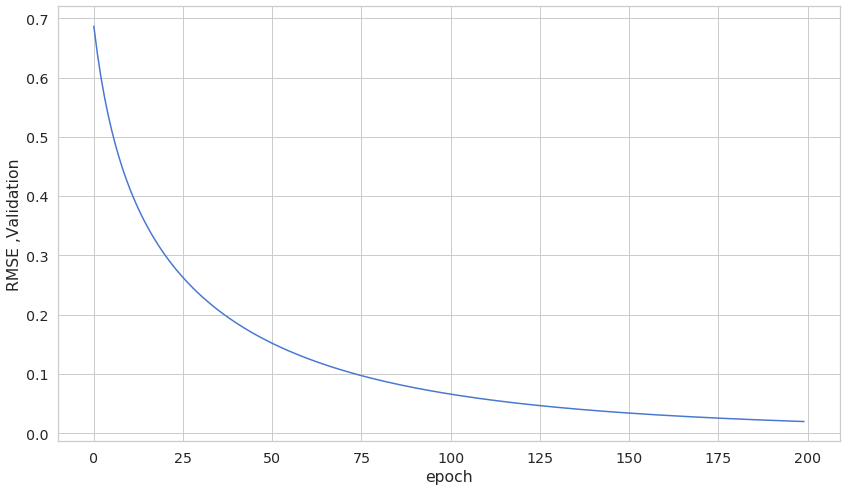

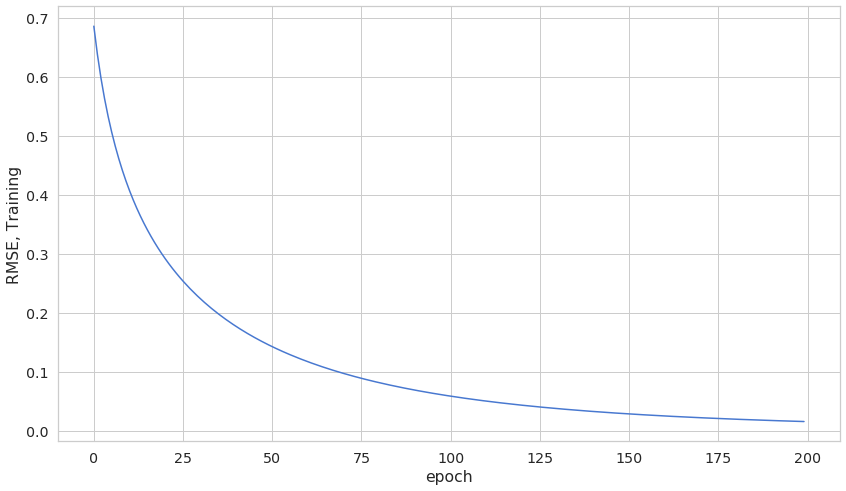

In [30]:
plt.plot(range(recommender.n_epochs), recommender.val_error);
plt.xlabel('epoch');
plt.ylabel('RMSE ,Validation');
plt.show()
plt.plot(range(recommender.n_epochs), recommender.train_error);
plt.xlabel('epoch');
plt.ylabel('RMSE, Training');
plt.show()
#TODO


# Making recommendations

In [31]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [35]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
    artist_ids = ratings_df.columns[artists_index]
    artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
    top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
    artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
    artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
    return artist_recommendations.sort_values("rating", ascending=False)

In [36]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,7,Marilyn Manson,0.052734
1,7,Marilyn Manson,0.043204
2,7,Marilyn Manson,0.029742
3,7,Marilyn Manson,0.029031
4,7,Marilyn Manson,0.025657
...,...,...,...
582,6618,D12,NaN
583,6618,D12,NaN
584,6618,D12,NaN
585,6618,D12,NaN


In [37]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

,id,name,rating
0,5995,Sofia Nizharadze,0.159075
1,6307,The Good Life,0.158594
2,7384,Lisabö,0.158078
3,7807,Toad,0.158018
4,7946,Rookie Of The Year,0.157911
5,7946,Rookie Of The Year,0.156096
6,11904,Monster Movie,0.154805
7,12333,Languis,0.154754
8,13371,Karl Jenkins,0.154664
9,13371,Karl Jenkins,0.154639


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**

In [122]:
ratings_df
predictions_index
# create_artist_ratings(artists_df, artists_index, ratings, n=100):
a = create_artist_ratings(artists, predictions_index, rating_predictions, n=20)
# a

In [123]:
name_m = (i for i  in a.name)
rate_m = (j for j in a.rating)
names = dict()
for i  in a.index:
    name = next(name_m)
    rate = next(rate_m)
    if name in names:
        names[name] += rate
    else:
        names[name] = rate

In [124]:
import numpy as np
import matplotlib.pyplot as plt

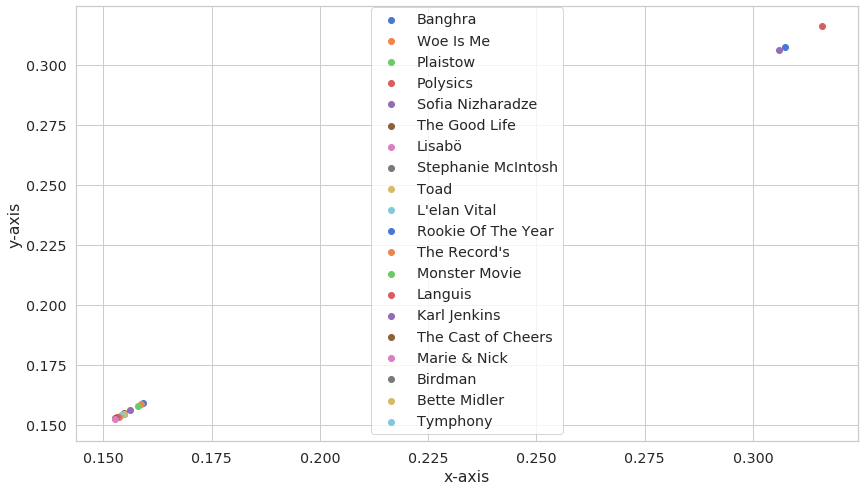

In [125]:

fig, ax = plt.subplots()


for key, value in names.items():
    ax.scatter(value,value,label=key)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()